In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join, isdir
from tqdm import tqdm

In [2]:
D_s_m = {'GDSC1':'GDSC_v1', 'GDSC2':'GDSC_v2', 'CTD2':'CTRP_v2', 'CTPR':'CTRP_v1', 'MR_NCI60':'NCI_60', 'PRISM2':'PRISM2', 'DTP':'DTP'}

In [3]:
datasets = ['atlantic', 'atl_only_phos', 'atl_only_full', 'Gygi', 'kinase_scores', 'RNA', 'drug_scores', 'atl_full_and_kinases', 'identity']

In [4]:
mypath='/home/icb/manuel.gander/Atl/data/dr_NN'
keys=listdir(mypath)
if '.ipynb_checkpoints' in keys:
    keys.remove('.ipynb_checkpoints')
len(keys)

192

In [5]:
# Check if there are keys missing

In [15]:
frames = []
for k in tqdm(keys):
    df = pd.read_csv(mypath+'/'+k)
    frames.append(df.sort_values('test_losses').iloc[:1])
Df = pd.concat(frames, ignore_index=True)
Df['ratio'] = Df['test_losses']/Df['mean_loss']

100%|███████████████████████████████████████████████████████████████████████████████| 192/192 [00:00<00:00, 515.23it/s]


In [20]:
Df

,Unnamed: 0,dataset,n_components,method,dense_dim,tr_losses,test_losses,mean_loss,ratio
0,457,identity,30,rdkit,50,19.009638,9.286738,7.941604,1.169378
1,218,atl_only_full,2,kino,5,13.306699,7.016717,5.803592,1.209030
2,2,RNA,30,rdkit,50,75.142815,19.257414,8.565140,2.248348
3,4,atl_only_phos,10,als,50,20.822386,17.901218,5.562743,3.218056
4,205,atl_only_full,30,als,10,11.041122,9.391116,5.803592,1.618156
...,...,...,...,...,...,...,...,...,...
187,15,atl_only_full,10,rdkit,20,17.035379,7.556402,5.803592,1.302022
188,13,RNA,30,als,20,43.101006,19.735159,8.565140,2.304126
189,391,RNA,5,als,5,19.555189,10.080603,8.565140,1.176934
190,494,RNA,5,kino,5,18.322273,9.162983,8.565140,1.069800


In [28]:
# Pick the one with the best hyperparameters for each dataset and method
crit = 'ratio'

datasets = sorted(set(Df['dataset']))
methods = sorted(set(Df['method']))


frames = []
for dataset in datasets:
    for method in methods:
        dfs = Df[(Df['dataset']==dataset)&(Df['method']==method)].copy()
        frames.append(dfs.sort_values(crit).iloc[:1])
dfm = pd.concat(frames, ignore_index=True)
dfm.sort_values('ratio')

,Unnamed: 0,dataset,n_components,method,dense_dim,tr_losses,test_losses,mean_loss,ratio
10,498,identity,10,kino,50,15.339684,7.781849,7.941604,0.979884
8,130,atl_only_phos,2,rdkit,20,9.873633,5.462414,5.562743,0.981964
11,479,identity,5,rdkit,50,15.450652,7.811174,7.941604,0.983576
2,499,RNA,2,rdkit,20,17.413910,8.469585,8.565140,0.988844
1,410,RNA,2,kino,50,17.343077,8.477027,8.565140,0.989713
9,499,identity,30,als,50,15.451741,7.880179,7.941604,0.992265
5,272,atl_only_full,2,rdkit,20,9.224905,5.781940,5.803592,0.996269
4,499,atl_only_full,2,kino,50,9.437315,5.807514,5.803592,1.000676
7,382,atl_only_phos,2,kino,20,9.643679,6.138988,5.562743,1.103590
3,465,atl_only_full,2,als,5,11.621395,6.535327,5.803592,1.126083


In [29]:
dfm

,Unnamed: 0,dataset,n_components,method,dense_dim,tr_losses,test_losses,mean_loss,ratio
0,499,RNA,2,als,5,19.489874,9.766791,8.565140,1.140296
1,410,RNA,2,kino,50,17.343077,8.477027,8.565140,0.989713
2,499,RNA,2,rdkit,20,17.413910,8.469585,8.565140,0.988844
3,465,atl_only_full,2,als,5,11.621395,6.535327,5.803592,1.126083
4,499,atl_only_full,2,kino,50,9.437315,5.807514,5.803592,1.000676
5,272,atl_only_full,2,rdkit,20,9.224905,5.781940,5.803592,0.996269
6,401,atl_only_phos,2,als,20,10.623515,6.440562,5.562743,1.157803
7,382,atl_only_phos,2,kino,20,9.643679,6.138988,5.562743,1.103590
8,130,atl_only_phos,2,rdkit,20,9.873633,5.462414,5.562743,0.981964
9,499,identity,30,als,50,15.451741,7.880179,7.941604,0.992265


In [15]:
# For a better overview make heatmap plots
# Get the median correlation and the median RMSE for each dataset-source combination

In [30]:
D_s_m = {'als':'ALS', 'kino':'Kinobeads', 'rdkit':'rdKit (using SMILES)'}

In [31]:
D_fn = {'Gygi':'Gygi-CCLE', 'RNA':'Transcriptomics', 'atl_full_and_kinases':'Atl. Full+Kinase scores',
        'atl_only_full':'Atl. Full Proteome', 'atl_only_phos':'Atl. Phosphoproteome',
        'atlantic': 'Atl. Full+Phosphoproteome', 'drug_scores':'Atl. Drug Scores',
        'identity':'Tissue of Origin', 'kinase_scores':'Atl. Kinase Scores'}

In [39]:
datasets = sorted(set(dfm['dataset']))
methods = sorted(set(dfm['method']))

Zp = np.full((len(datasets), len(methods)), np.NaN)
Zr = np.full((len(datasets), len(methods)), np.NaN)
for i,dataset in enumerate(datasets):
    for j,method in enumerate(methods):
        dfms = dfm[(dfm['dataset']==dataset)&(dfm['method']==method)]
        Zp[i,j]=np.nanmedian(dfms['ratio'])
Zp = pd.DataFrame(Zp, index=[D_fn[a] for a in datasets], columns=[D_s_m[a] for a in methods])

Text(0.5, 70.56666666666665, 'Drug Represenations')

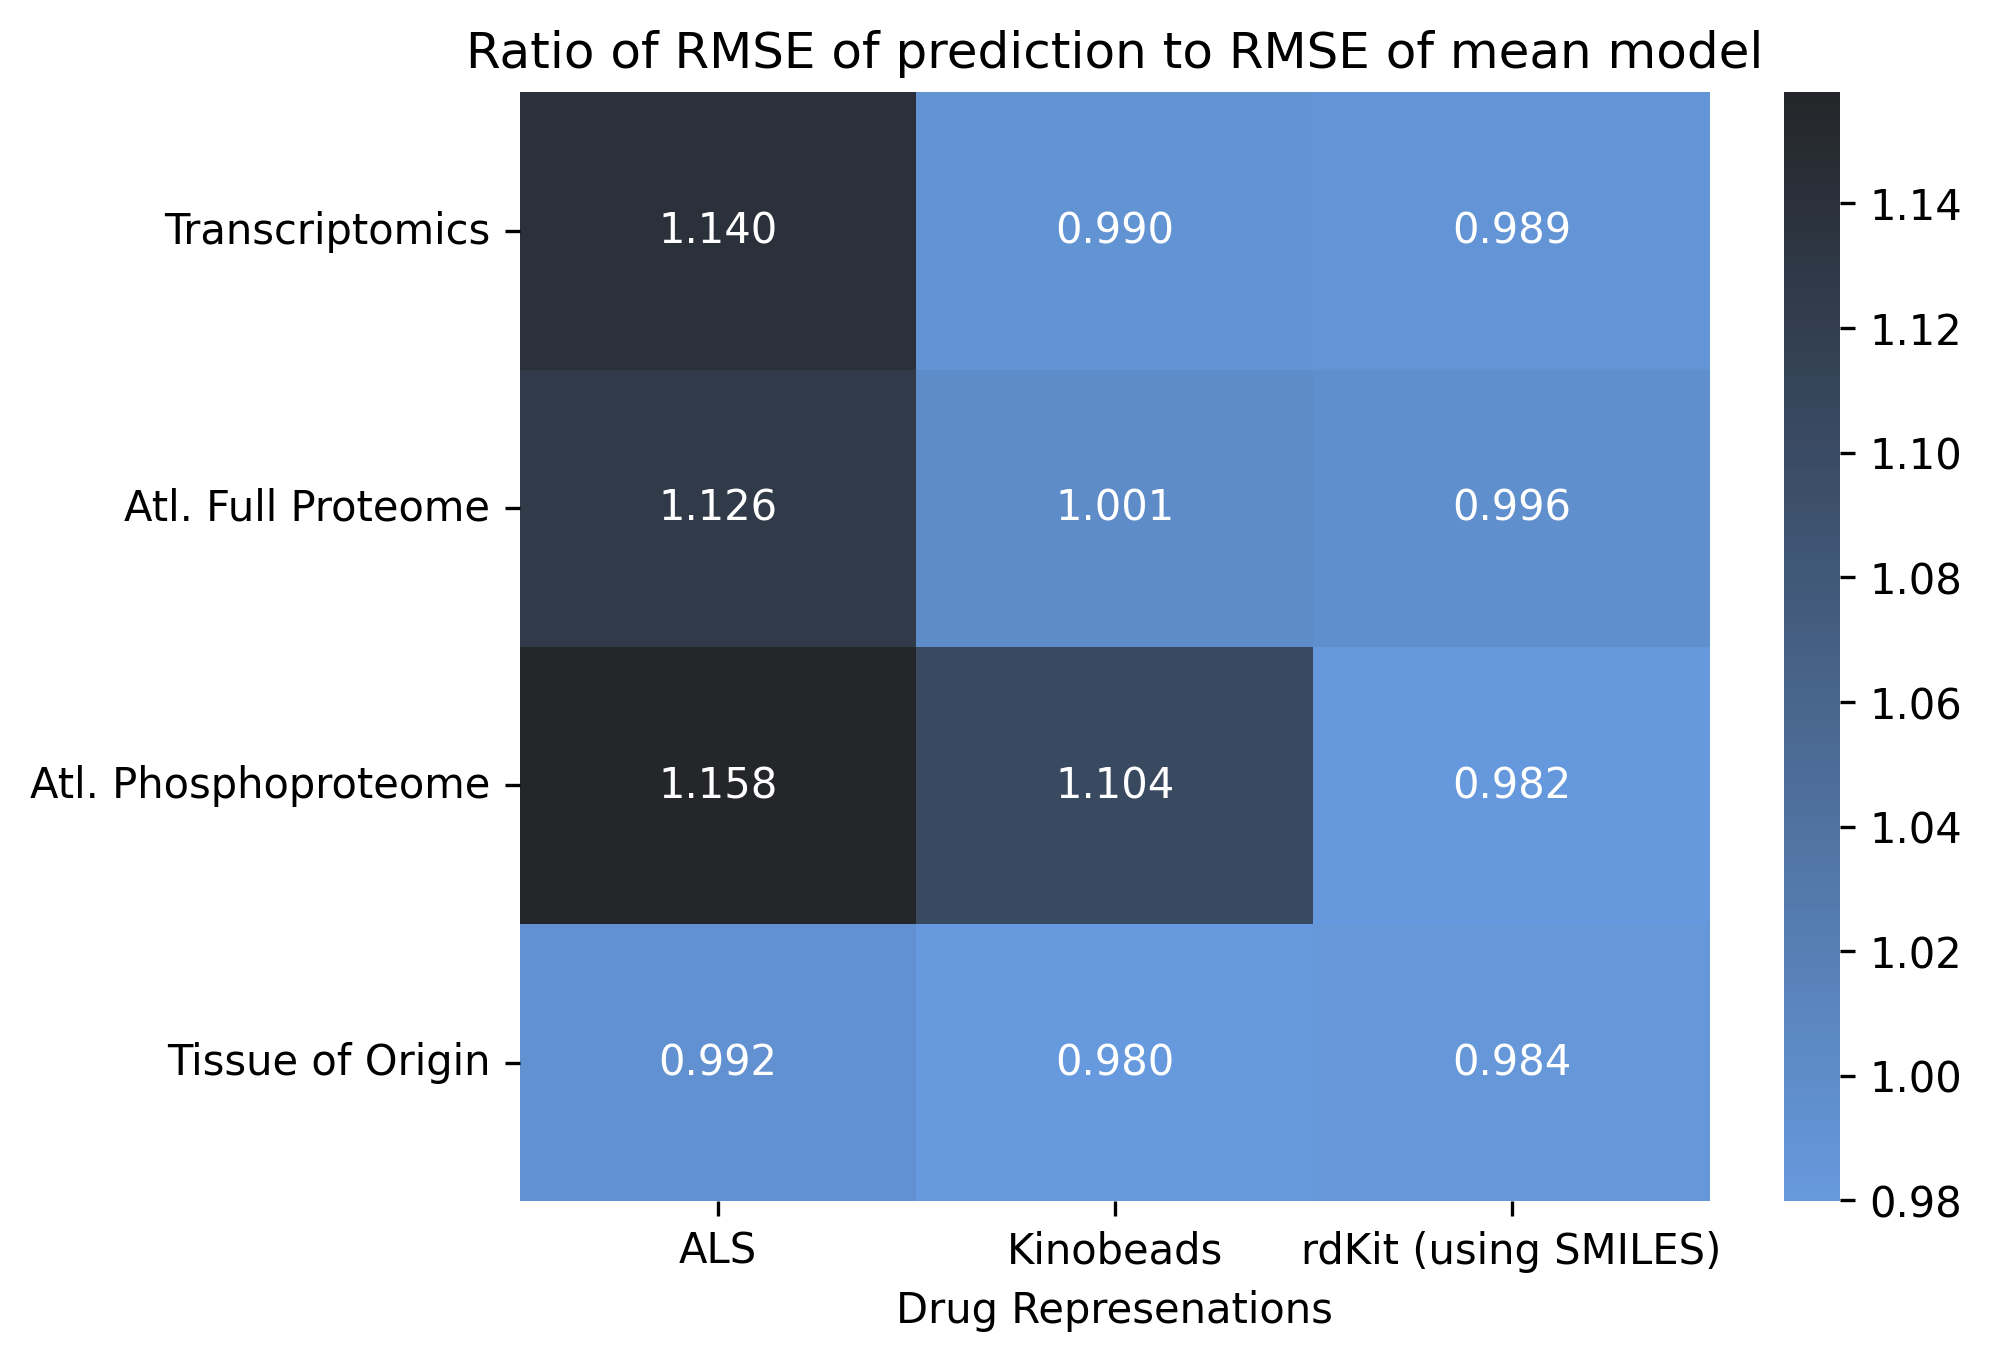

In [51]:
plt.rcParams['figure.dpi'] = 300
cmap = sns.dark_palette("#69d", reverse=True, as_cmap=True)
sns.heatmap(data=Zp, annot=True, cmap=cmap, fmt=".3f")
plt.title('Ratio of RMSE of prediction to RMSE of mean model')
plt.xlabel('Drug Represenations')